In [1]:

import numpy as np
import pandas as pd

#from models import Mw, Firm
#from funcs import snap
from scipy.interpolate import interp1d #functional interpolation
import matplotlib.pyplot as plt

In [3]:
#setup
n_points = 10
s_list = [ (1/(n_points))*(i+1) for i in range(0,n_points)]  #values for weights
p_list = [ (1/(n_points))*(i+1) for i in range(0,n_points)] #values for prices - allows the boundaries
v0 = [1]*len(s_list)

#hardcoded for now, but will make functions later
policyB = 0.2 ## policy for player 2 - make deterministic for now
Beta = 0.9
Nu = 0.95
N=5

In [4]:
#wrap up the policy iteration in a function called simulate_game, that splits weight equally among competitors
def simulate_game(policyB, Beta, Nu, N, num_iterations=100):
    # Set up initial conditions
    v0 = [1] * len(s_list)
    v_curr = v0
    p_curr = [1] * len(s_list)

    for _ in range(num_iterations):
        v_new = [-1] * len(v_curr)  # Prep new list

        # Define functions for analysis
        interp_v_func = interp1d(s_list, v_curr, kind='linear', fill_value='extrapolate')
        interp_p_func = interp1d(s_list, p_curr, kind='linear', fill_value='extrapolate')

        for j in range(len(s_list)):
            s = s_list[j]
            values = [-1] * len(p_list)

            for i in range(len(p_list)):
                p = p_list[i]
                flow_u = p * s
                new_weight_a = s * (1 - (Nu * p))
                new_weight_b = (1 - s) / (N - 1) * (1 - (Nu * interp_p_func((1 - s) / (N - 1))))
                new_state = new_weight_a / (new_weight_a + (N - 1) * new_weight_b)
                future_u = Beta * interp_v_func(new_state)

                # Interpolating function
                values[i] = flow_u + future_u

            v_new[j] = np.array(values).max()
            p_curr[j] = p_list[np.array(values).argmax()]

        v_curr = v_new

    return v_curr, p_curr

# Set parameters
policyB = 0.2
Beta = 0.9
Nu = 0.95
N = 5

# Call the function
resulting_values, resulting_prices = simulate_game(policyB, Beta, Nu, N, num_iterations=100)


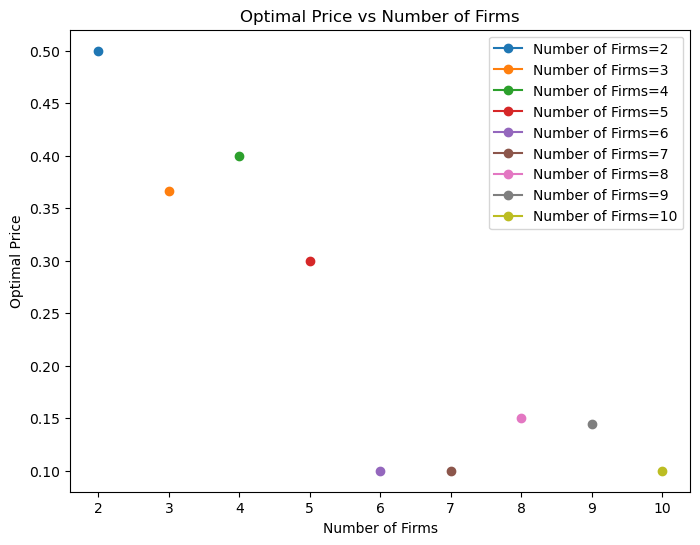

In [5]:

#linear interpolation function for getting right result (if there are N firms, assume each gets w=1/N)
def linear_interpolation(lst, k):
    n = len(lst)
    position = n * 1 / k-1

    # Find the indices of the two elements surrounding the position
    low_index = int(position)
    high_index = low_index + 1

    # If high_index is out of bounds, set it to the last element
    high_index = min(high_index, n - 1)
    low_index=max(low_index, 0)

    # Calculate the fractional part for interpolation
    fraction = position - low_index

    # Linear interpolation
    result = (1 - fraction) * lst[low_index] + fraction * lst[high_index]

    return result


# Plotting optimal prices as the number of firms goes from 2-11
plt.figure(figsize=(8, 6))

for number_firms in range(2, 11):
    # Calculate the interpolated price for each N
    resulting_values, resulting_prices=simulate_game(policyB, Beta, Nu, N=number_firms, num_iterations=100)
    optimal_price = linear_interpolation(resulting_prices, number_firms)
    plt.plot(number_firms, optimal_price, marker='o', label=f'Number of Firms={number_firms}')

plt.xlabel('Number of Firms')
plt.ylabel('Optimal Price')
plt.title('Optimal Price vs Number of Firms')
plt.legend()
plt.show()


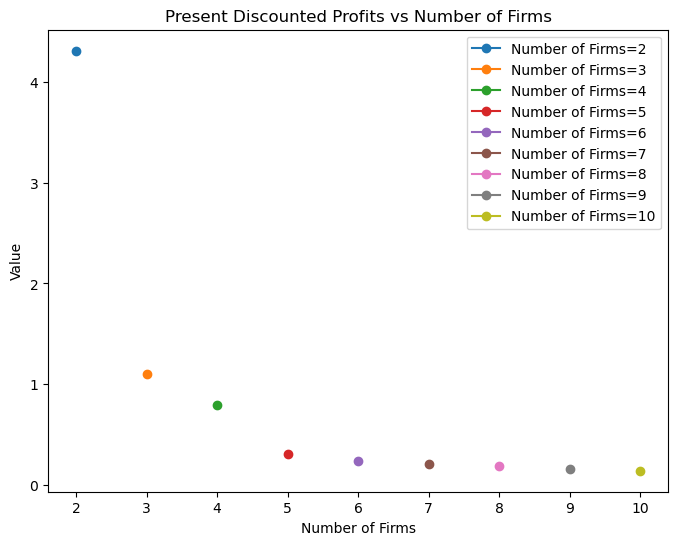

In [6]:
#plotting the value function as the number of firms varies betweens 2-10
plt.figure(figsize=(8, 6))

for number_firms in range(2, 11):
    # Calculate the interpolated price for each N
    resulting_values, resulting_prices=simulate_game(policyB, Beta, Nu, N=number_firms, num_iterations=100)
    optimal_value = linear_interpolation(resulting_values, number_firms)
    plt.plot(number_firms, optimal_value, marker='o', label=f'Number of Firms={number_firms}')

plt.xlabel('Number of Firms')
plt.ylabel('Value')
plt.title('Present Discounted Profits vs Number of Firms')
plt.legend()
plt.show()